 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [128]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [129]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [130]:
# Count nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [131]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [132]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns,  index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [165]:
# Count nulls
algo_returns.isnull().mean() *100
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [166]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [333]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv)
sp_tsx_history_df['Date'] = pd.to_datetime(sp_tsx_history_df["Date"], dayfirst = True)
sp_tsx_history_df.set_index(sp_tsx_history_df['Date'], inplace=True)
sp_tsx_history_df.drop(columns=['Date'],inplace=True)
sp_tsx_history_df = sp_tsx_history_df.sort_values("Date", ascending=True)
sp_tsx_history_df.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [334]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [352]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$', '')
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(',', '')
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype('float')
sp_tsx_history_df['Close']
sp_tsx_history_df.head()

Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

In [353]:
# Calculate Daily Returns
sp_tsx_history_df.isnull().sum()
sp_tsx_returns_df = sp_tsx_history_df.pct_change()
sp_tsx_returns_df.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [354]:
# Drop nulls
sp_tsx_returns_df.pct_change
sp_tsx_returns_df.dropna(inplace=True)
sp_tsx_returns_df.head()

Close
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

In [355]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns_df = sp_tsx_returns_df.rename(columns={"Close":"SP_TSX"})
sp_tsx_returns_df.head()

SP_TSX
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [356]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([whale_returns_df,algo_returns_df, sp_tsx_returns_df], axis='columns', join='inner')
combined_portfolios_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-02                          NaN                     NaN -0.008158   
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   

              Algo 2    SP_TSX  
Date                            
2015-03-02  0.003200  0.001950  
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

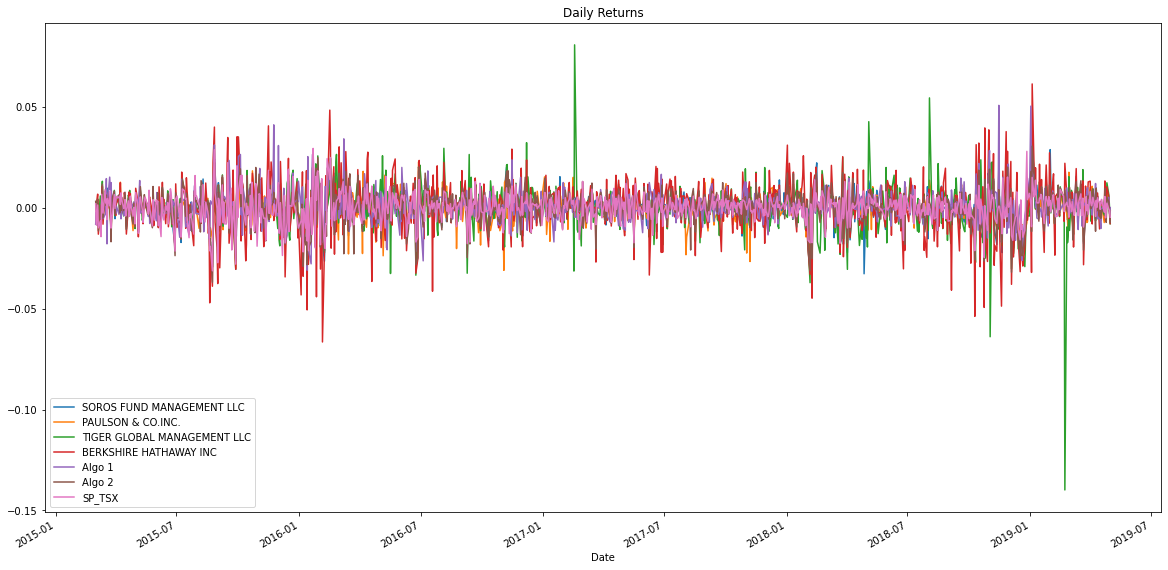

In [357]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

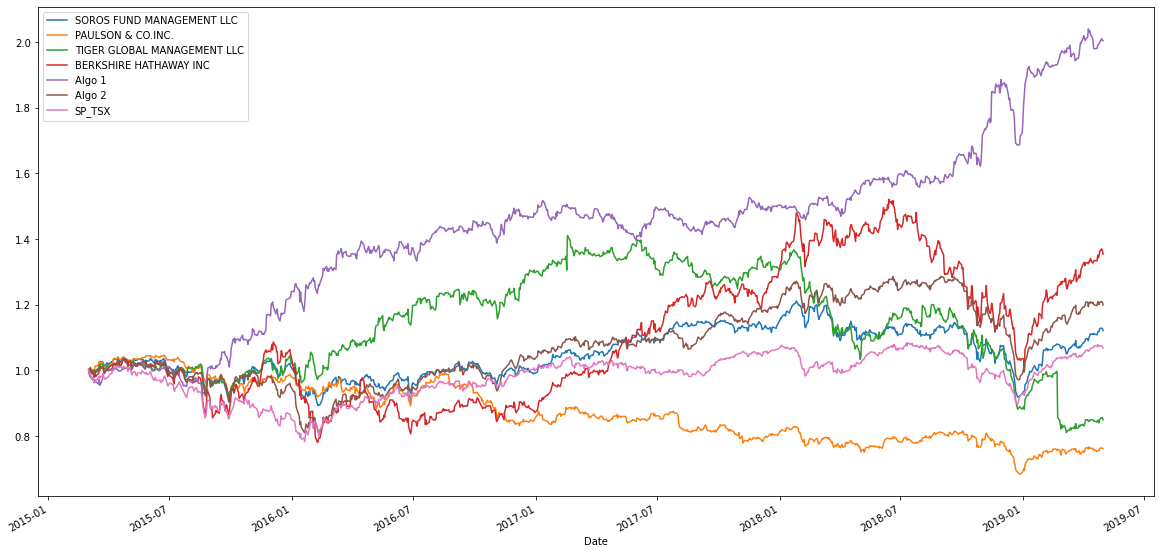

In [361]:
# Calculate cumulative returns of all portfolios
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()

# Plot cumulative returns
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

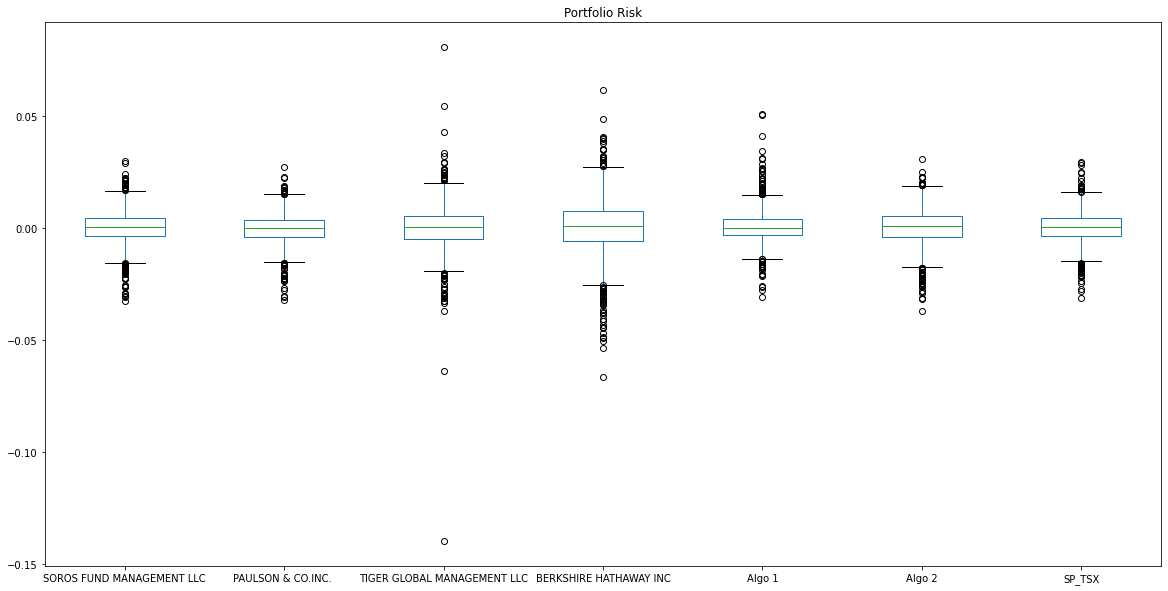

In [362]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [363]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008323
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007590
SP_TSX                         0.007031
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [364]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_sp_tsx = sp_tsx_returns_df.std().sort_values(ascending=False)
daily_std_sp_tsx

# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_sp_tsx =[daily_std > daily_std['SP_TSX']]
portfolios_riskier_than_sp_tsx

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 SP_TSX                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [365]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132121
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120491
SP_TSX                         0.111613
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

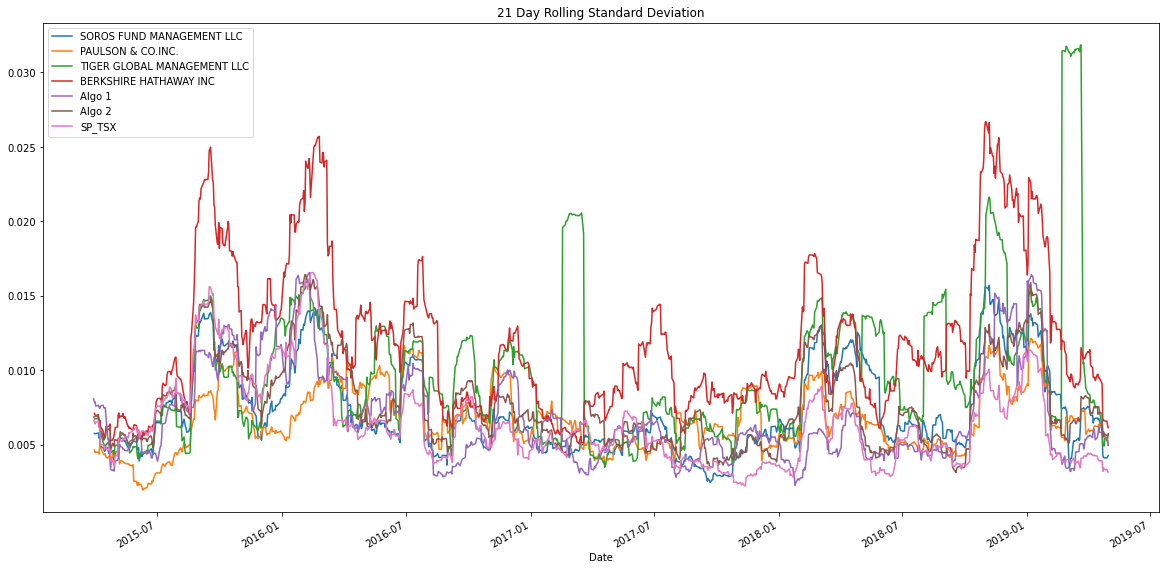

In [366]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

In [367]:
# Calculate the correlation
# Display de correlation matrix
correlation = combined_portfolios_df.corr()
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
SP_TSX                                        0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2                                          0.506689   
SP_TSX                                          0.440583   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750181  0.313795  0.826667   
PAULSON & CO.INC.                          0.540033  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC                0.423524  0.161236  0.506689   
BERKSHIRE HATHAWAY INC                     1.000000  0.289378  0.684609   
Algo 1                                     0.289378  1.000000  0.284840   
Algo 2                                     0.684609  0.284840  1.000000   
SP_TSX                                     0.557250  0.309759  0.737391   

                               SP_TSX  
SOROS FUND MANAGEMENT LLC    0.673930  
PAULSON & CO.INC.            0.486511  
TIGER GLOBAL MANAGEMENT LLC  0.440583  
BERKSHIRE HATHAWAY INC       0.557250  
Algo 1                       0.309759  
Algo 2                       0.737391  
SP_TSX                       1.000000

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

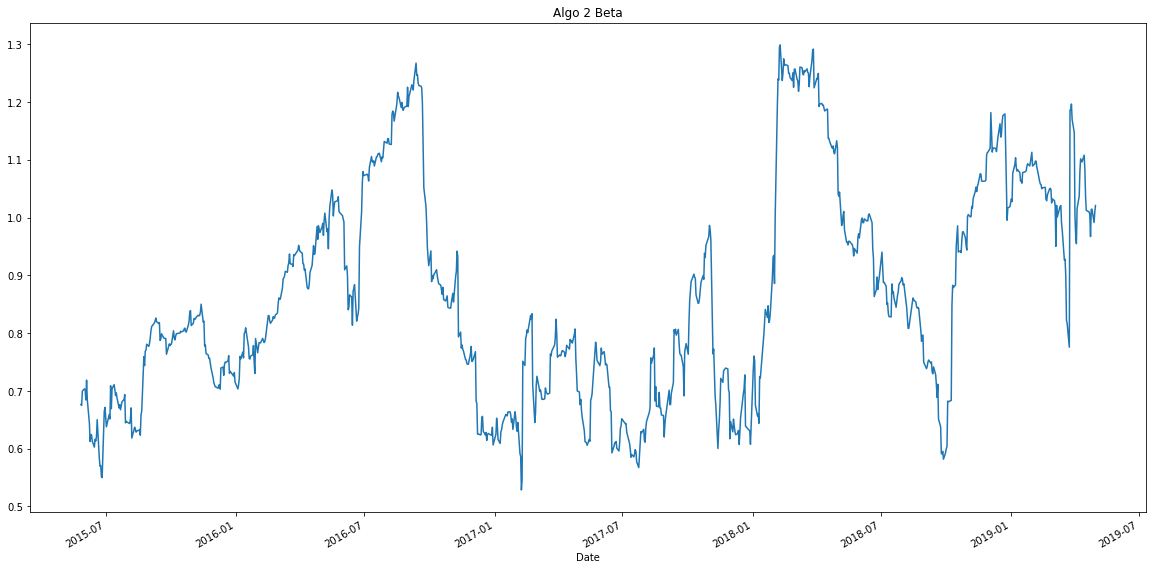

In [378]:
# Calculate covariance of a single portfolio
algo_2_covariance = combined_portfolios_df['Algo 2'].rolling(window=60).cov(combined_portfolios_df['SP_TSX'])
algo_2_covariance

# Calculate variance of S&P TSX
variance = combined_portfolios_df['SP_TSX'].rolling(window=60).var()
variance

# Computing beta
algo_2_beta = algo_2_covariance / variance

# Plot beta trend
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20, 10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

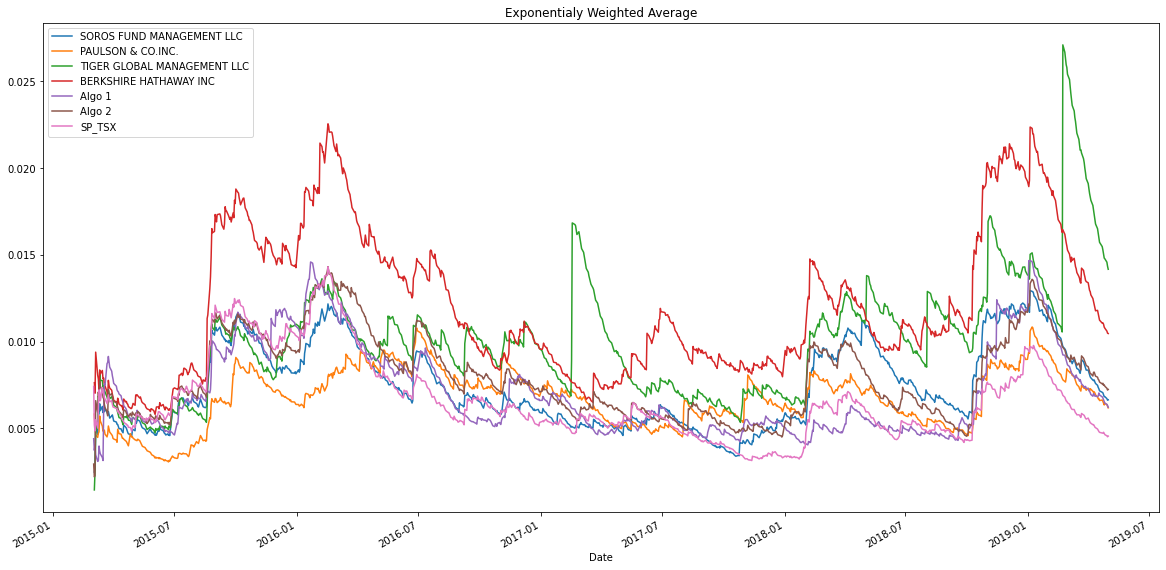

In [379]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [380]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
SP_TSX                         0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

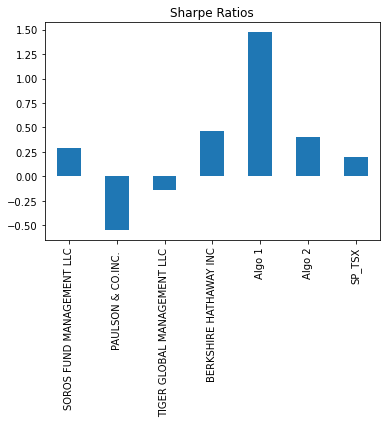

In [381]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [414]:
# Reading data from 1st stock
shop_historical_csv = Path("Resources/shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
shop_historical_df = shop_historical_df.drop('Symbol', axis=1)
shop_historical_df.head()

Close
Date              
2018-01-02  132.06
2018-01-03  135.15
2018-01-04  137.46
2018-01-05  137.26
2018-01-08  139.51

In [415]:
# Reading data from 2nd stock
otex_historical_csv = Path("Resources/otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
otex_historical_df = otex_historical_df.drop('Symbol', axis=1)
otex_historical_df.head()

Close
Date             
2018-01-02  43.58
2018-01-03  43.07
2018-01-04  42.91
2018-01-05  42.57
2018-01-08  42.16

In [416]:
# Reading data from 3rd stock
l_historical_csv = Path("Resources/l_historical.csv")
l_historical_df = pd.read_csv(l_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
l_historical_df = l_historical_df.drop('Symbol', axis=1)
l_historical_df.head()

Close
Date             
2018-01-02  57.99
2018-01-03  57.41
2018-01-04  57.42
2018-01-05  57.42
2018-01-08  56.86

In [417]:
# Combine all stocks in a single DataFrame
my_portfolio_combined_df = pd.concat([shop_historical_df, otex_historical_df, l_historical_df], axis="columns", join="inner")
my_portfolio_combined_df


Close  Close  Close
Date                            
2018-01-02  132.06  43.58  57.99
2018-01-03  135.15  43.07  57.41
2018-01-04  137.46  42.91  57.42
2018-01-05  137.26  42.57  57.42
2018-01-08  139.51  42.16  56.86
...            ...    ...    ...
2019-12-20  513.22  58.68  67.90
2019-12-23  511.62  57.89  67.68
2019-12-24  525.39  57.44  67.67
2019-12-27  534.76  57.70  67.78
2019-12-30  517.79  57.19  67.33

[501 rows x 3 columns]

In [418]:
# Reset Date index
my_portfolio_combined_df.sort_index(inplace=True)
my_portfolio_combined_df

Close  Close  Close
Date                            
2018-01-02  132.06  43.58  57.99
2018-01-03  135.15  43.07  57.41
2018-01-04  137.46  42.91  57.42
2018-01-05  137.26  42.57  57.42
2018-01-08  139.51  42.16  56.86
...            ...    ...    ...
2019-12-20  513.22  58.68  67.90
2019-12-23  511.62  57.89  67.68
2019-12-24  525.39  57.44  67.67
2019-12-27  534.76  57.70  67.78
2019-12-30  517.79  57.19  67.33

[501 rows x 3 columns]

In [420]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_combined_df.columns = ['SHOP','OTEX','L']
my_portfolio_combined_df.head()

SHOP   OTEX      L
Date                            
2018-01-02  132.06  43.58  57.99
2018-01-03  135.15  43.07  57.41
2018-01-04  137.46  42.91  57.42
2018-01-05  137.26  42.57  57.42
2018-01-08  139.51  42.16  56.86

In [427]:
# Calculate daily returns
my_portfolio_combined_df.isnull().sum()
my_portfolio_combined_returns_df = my_portfolio_combined_df.pct_change()
my_portfolio_combined_returns_df.head()

# Drop NAs
my_portfolio_combined_df.dropna()
my_portfolio_combined_df

# Display sample data
# Display a few rows
my_portfolio_combined_returns.dropna(inplace=True)
my_portfolio_combined_returns.head()



SHOP      OTEX         L
Date                                    
2018-01-03  0.023398 -0.011703 -0.010002
2018-01-04  0.017092 -0.003715  0.000174
2018-01-05 -0.001455 -0.007924  0.000000
2018-01-08  0.016392 -0.009631 -0.009753
2018-01-09 -0.011254 -0.000712  0.008969

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [428]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


weights = [1/3, 1/3, 1/3]
my_portfolio_weighted_returns = my_portfolio_combined_returns.dot(weights)
my_portfolio_weighted_returns.head()
my_portfolio_weighted_returns = my_portfolio_weighted_returns.rename("Custom")
my_portfolio_weighted_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [450]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios_2_df = pd.concat([whale_returns_df,algo_returns_df, sp_tsx_returns_df, my_portfolio_weighted_returns], axis='columns', join='inner')
combined_portfolios_2_df.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                   0.004658            0.000027   
2018-01-04                  -0.000914            0.004196   
2018-01-05                   0.004072            0.000823   
2018-01-08                   0.004473           -0.003739   
2018-01-09                  -0.001028            0.000872   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.001979                0.005676 -0.000890   
2018-01-04                     0.010743                0.004065 -0.000914   
2018-01-05                     0.000737                0.022023 -0.003839   
2018-01-08                     0.005085                0.003435  0.001653   
2018-01-09                     0.001789                0.000708 -0.001004   

              Algo 2    SP_TSX    Custom  
Date                                      
2018-01-03  0.008175  0.003774  0.000565  
2018-01-04  0.004294  0.002528  0.004517  
2018-01-05  0.006405 -0.003869 -0.003126  
2018-01-08  0.000658 -0.001944 -0.000997  
2018-01-09 -0.002091  0.000097 -0.000999

In [437]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

# Combining Portfolios o one data frame 
combined_portfolios_2_df_daily_std = combined_portfolios_2_df.std().sort_values(ascending=False)
combined_portfolios_2_df_daily_std


BERKSHIRE HATHAWAY INC         0.014328
Custom                         0.014132
TIGER GLOBAL MANAGEMENT LLC    0.013848
SOROS FUND MANAGEMENT LLC      0.009177
Algo 2                         0.008672
Algo 1                         0.007561
PAULSON & CO.INC.              0.007203
SP_TSX                         0.006244
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [439]:
# Calculate the annualized `std`
combined_portfolios_2_df_annualized_std = combined_portfolios_2_df *np.sqrt(252)
combined_portfolios_2_df_annualized_std

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                   0.073936            0.000430   
2018-01-04                  -0.014515            0.066617   
2018-01-05                   0.064634            0.013069   
2018-01-08                   0.071000           -0.059350   
2018-01-09                  -0.016311            0.013847   
...                               ...                 ...   
2019-04-25                  -0.004522           -0.020491   
2019-04-26                   0.129369            0.145437   
2019-04-29                   0.019912            0.043165   
2019-04-30                  -0.020550           -0.035106   
2019-05-01                  -0.092819           -0.021291   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.031413                0.090108 -0.014132   
2018-01-04                     0.170537                0.064527 -0.014511   
2018-01-05                     0.011695                0.349600 -0.060946   
2018-01-08                     0.080723                0.054528  0.026247   
2018-01-09                     0.028401                0.011244 -0.015939   
...                                 ...                     ...       ...   
2019-04-25                    -0.081804                0.076956  0.010834   
2019-04-26                     0.196127                0.165633  0.047324   
2019-04-29                     0.099226                0.082917  0.082673   
2019-04-30                    -0.004115               -0.058766 -0.046733   
2019-05-01                    -0.125985               -0.124345  0.001488   

              Algo 2    SP_TSX    Custom  
Date                                      
2018-01-03  0.129775  0.059916  0.008964  
2018-01-04  0.068170  0.040133  0.071707  
2018-01-05  0.101676 -0.061417 -0.049627  
2018-01-08  0.010442 -0.030867 -0.015830  
2018-01-09 -0.033187  0.001547 -0.015853  
...              ...       ...       ...  
2019-04-25 -0.115050 -0.009973  0.054942  
2019-04-26  0.083431  0.035779  0.051484  
2019-04-29  0.044914 -0.012508  0.052435  
2019-04-30 -0.024917 -0.018781  0.427618  
2019-05-01 -0.116805 -0.074659 -0.001259  

[328 rows x 8 columns]

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

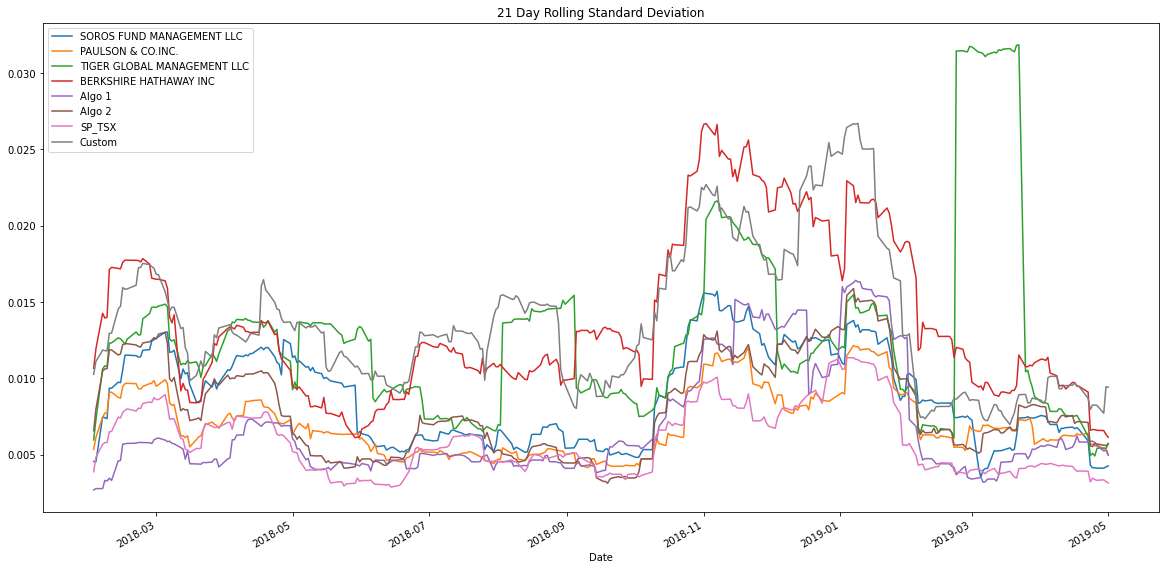

In [441]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_portfolios_2_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))



### Calculate and plot the correlation

In [444]:
# Calculate and plot the correlation
combined_portfolios_2_df_correlation = combined_portfolios_2_df.corr()
combined_portfolios_2_df_correlation



SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.764174   
PAULSON & CO.INC.                             0.764174            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.526710            0.536534   
BERKSHIRE HATHAWAY INC                        0.782414            0.647407   
Algo 1                                        0.305525            0.320568   
Algo 2                                        0.834431            0.797494   
SP_TSX                                        0.686681            0.623728   
Custom                                        0.556093            0.385305   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.526710   
PAULSON & CO.INC.                               0.536534   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.384316   
Algo 1                                          0.130845   
Algo 2                                          0.485258   
SP_TSX                                          0.438781   
Custom                                          0.303971   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.782414  0.305525  0.834431   
PAULSON & CO.INC.                          0.647407  0.320568  0.797494   
TIGER GLOBAL MANAGEMENT LLC                0.384316  0.130845  0.485258   
BERKSHIRE HATHAWAY INC                     1.000000  0.294696  0.783254   
Algo 1                                     0.294696  1.000000  0.321837   
Algo 2                                     0.783254  0.321837  1.000000   
SP_TSX                                     0.649817  0.284789  0.754326   
Custom                                     0.647413  0.214770  0.563756   

                               SP_TSX    Custom  
SOROS FUND MANAGEMENT LLC    0.686681  0.556093  
PAULSON & CO.INC.            0.623728  0.385305  
TIGER GLOBAL MANAGEMENT LLC  0.438781  0.303971  
BERKSHIRE HATHAWAY INC       0.649817  0.647413  
Algo 1                       0.284789  0.214770  
Algo 2                       0.754326  0.563756  
SP_TSX                       1.000000  0.579228  
Custom                       0.579228  1.000000

<AxesSubplot:>

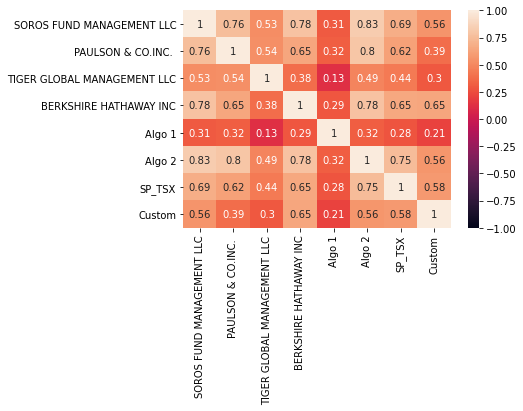

In [445]:
# Using heatmap to plot
sns.heatmap(combined_portfolios_2_df_correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

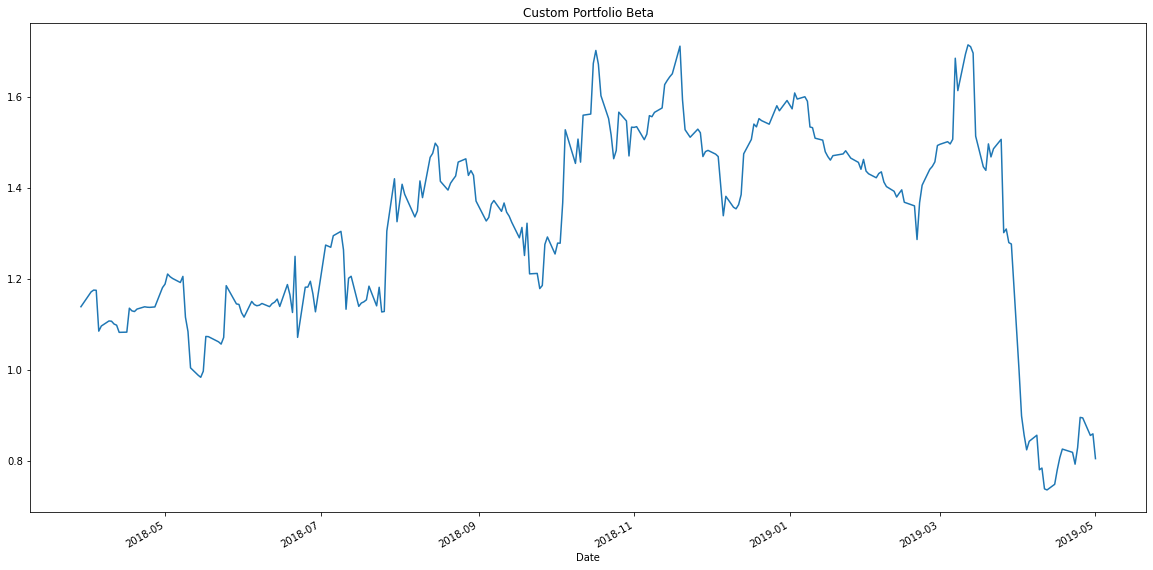

In [449]:
# Calculate and plot Beta

#Covariance calculated
custom_covariance = combined_portfolios_2_df['Custom'].rolling(window=60).cov(combined_portfolios_2_df['SP_TSX'])
custom_covariance
# Calculate variance of all daily returns vs. SP_TSX
variance_2 = combined_portfolios_2_df['SP_TSX'].rolling(window=60).var()
variance_2
# Calculate beta of all daily returns 
custom_beta = custom_covariance / variance_2
custom_beta_plot = custom_beta.plot(title="Custom Portfolio Beta", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [446]:
# Calculate Annualzied Sharpe Ratios
combined_portfolios_2_df_sharpe_ratios = (combined_portfolios_2_df.mean() * 252) / (combined_portfolios_2_df.std() * np.sqrt(252))
combined_portfolios_2_df_sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.901461
Custom                         1.564547
BERKSHIRE HATHAWAY INC         0.195907
SP_TSX                         0.034651
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

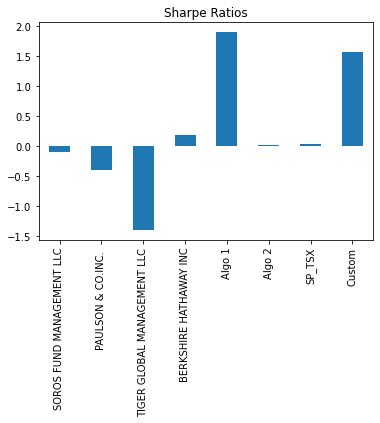

In [447]:
# Visualize the sharpe ratios as a bar plot
combined_portfolios_2_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# To access Harold's custom portfolio with algorithmic trading portfolios that are are doing so well compared to the market and whales portfolios we have investigated and identified the following:
    
# Harold has a more than average annualized standard deviation amongst all the portfolios being analyzed, which we can see not only by the numbers but we can see better pictured in the 21 day rolling standard deviation plot.
# Sharpe Ratios: The custom portfolio has the second highest sharpe ratio  followed by the Algo_1 porfolio.
# To Conclude : We can see that our custom porfolio is closest correlated to Algo_1 portfolio and the farthest correlated in fact the only negative correlation to Tiger Global Management portfolio.